# Séries de Fourier e compressão de audio

In [1]:
using LinearAlgebra
using Plots
using WAV
using FFTW

In [2]:
filepath = "../../../assets/attachments/data/audio/piano-phrase.wav"
fr, frs = wavread(filepath)
tempos = (0:size(fr)[1]-1)./frs

0.0f0:2.2675737f-5:3.8457823f0

In [40]:
WAVArray(frs, fr, "Frase de piano")

WAVArray{Float64, 2}(44100.0f0, [-0.004272591326639607; -0.004272591326639607; … ; -0.0037537766655476546; -0.0038453321939756462;;], "Frase de piano")

In [4]:
display(plot(tempos, fr[:,1], xlabel="tempo (s)", ylabel="amplitude", label=nothing,
    title="Sinal sonoro", titlefont=10))

In [5]:
println("Duração: $(length(fr)/frs) s")

Duração: 3.845805 s


In [6]:
frame_duration = 100 # ms - padrão mp3 é de 26 ms
frame_length = Int(div(frame_duration * frs, 1000))
fr_frame = fr[1:frame_length, 1]

4410-element Vector{Float64}:
 -0.004272591326639607
 -0.004272591326639607
 -0.004272591326639607
 -0.004394665364543596
 -0.004150517288735618
 -0.003906369212927641
 -0.004150517288735618
 -0.0045167394024475845
 -0.004394665364543596
 -0.004272591326639607
 -0.0045167394024475845
 -0.004272591326639607
 -0.004150517288735618
  ⋮
  0.17114780114139225
  0.19287697988830227
  0.21472823267311625
  0.2216864528336436
  0.20789208655049288
  0.17896053956724753
  0.1497848445081942
  0.13623462630085148
  0.14087343974120303
  0.15601062044129765
  0.17371135593737602
  0.19104586931974243

In [7]:
WAVArray(frs, fr_frame, "Frase de piano (primeiros $(frame_duration)ms)")

WAVArray{Float64, 1}(44100.0f0, [-0.004272591326639607, -0.004272591326639607, -0.004272591326639607, -0.004394665364543596, -0.004150517288735618, -0.003906369212927641, -0.004150517288735618, -0.0045167394024475845, -0.004394665364543596, -0.004272591326639607  …  0.21472823267311625, 0.2216864528336436, 0.20789208655049288, 0.17896053956724753, 0.1497848445081942, 0.13623462630085148, 0.14087343974120303, 0.15601062044129765, 0.17371135593737602, 0.19104586931974243], "Frase de piano (primeiros 100ms)")

WAVArray{Float64, 1}(44100.0f0, [-0.004272591326639607, -0.004272591326639607, -0.004272591326639607, -0.004394665364543596, -0.004150517288735618, -0.003906369212927641, -0.004150517288735618, -0.0045167394024475845, -0.004394665364543596, -0.004272591326639607  …  0.21472823267311625, 0.2216864528336436, 0.20789208655049288, 0.17896053956724753, 0.1497848445081942, 0.13623462630085148, 0.14087343974120303, 0.15601062044129765, 0.17371135593737602, 0.19104586931974243], "Parte da frase de piano")

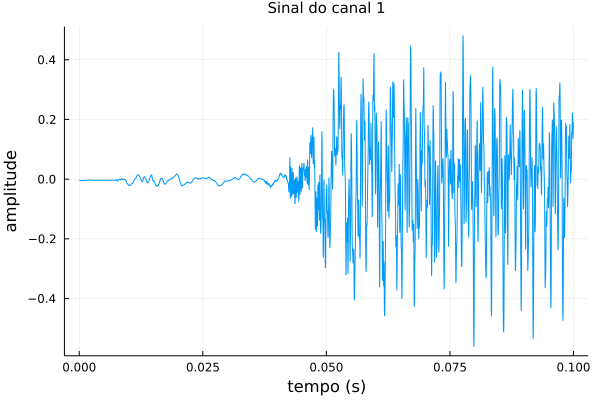

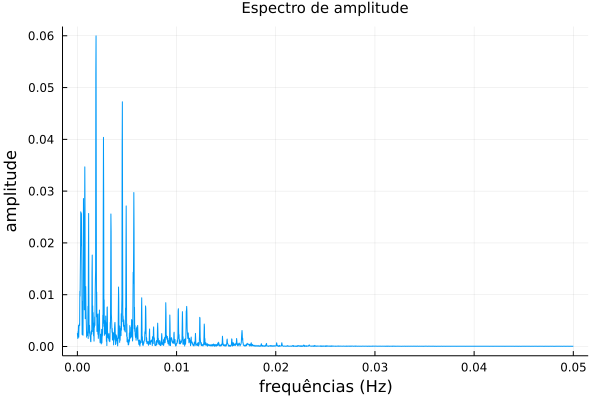

In [8]:
tempos_frame = (0:length(fr_frame)-1) / frs
freqs_frame = (0:div(frame_length, 2)) / frs # frequências
fr_frame_hat = rfft(fr_frame)
Z_frame = [
    abs(fr_frame_hat[1]) / frame_length; 
    2abs.(fr_frame_hat[2:end]) / frame_length
]

display(WAVArray(frs, fr_frame, "Parte da frase de piano"))

display(plot(tempos_frame, fr_frame, xlabel="tempo (s)", ylabel="amplitude", label=nothing,
    title="Sinal do canal 1", titlefont=10))
display(plot(freqs_frame, Z_frame, xlabel="frequências (Hz)", ylabel="amplitude", label=nothing,
    title="Espectro de amplitude", titlefont=10))


In [9]:
fr_frame_hat

2206-element Vector{ComplexF64}:
  -11.404889065218054 + 0.0im
    4.401345761508308 + 0.08595490000528591im
   3.4082877653630645 + 0.08196426411445668im
    6.356587472128003 - 0.18964797651701742im
    4.869113461640563 - 3.5923118212833733im
      8.3237839905087 + 3.2490025667385156im
   3.8612916512226576 + 0.8364064885072887im
   7.5179312978981425 - 2.333027626985048im
    8.227964101740415 + 4.1756121387133875im
    8.424895602709032 + 4.7428519336412im
    8.920129673515518 - 0.8452297771670483im
   -7.686096144051213 + 22.207414433972158im
    7.732962888637602 - 19.993290844392874im
                      ⋮
 -0.10421781409759334 + 0.0022773203065695746im
  -0.1023647288847882 + 0.0007464134727302174im
  -0.1045273553577637 - 0.005319946953127874im
 -0.09795696005902421 - 0.0027981825930202264im
   -0.099750114083906 + 0.003312592743422993im
 -0.09948480393847636 - 0.001197407566728509im
 -0.10341372301687313 - 0.0004984029279799795im
 -0.09738611974973299 + 0.004899745665589

In [10]:
Z_frame

2206-element Vector{Float64}:
 0.002586142645174162
 0.0019964557814350407
 0.001546155638268899
 0.002884088845556984
 0.0027441565703425906
 0.004052336221113851
 0.0017917648796805976
 0.0035698930264991334
 0.004184521541841969
 0.004384657578361313
 0.0040635307023729325
 0.01065755130764626
 0.009721841289621426
 ⋮
 4.727559755659162e-5
 4.6425147465890136e-5
 4.7466053443893756e-5
 4.444304650915745e-5
 4.52630851371637e-5
 4.512109284680428e-5
 4.690019230727219e-5
 4.4221905322364807e-5
 4.723224151822474e-5
 4.218296522720369e-5
 4.834626217683894e-5
 4.628294589012867e-5

In [11]:
[eachindex(Z_frame) Z_frame]

2206×2 Matrix{Float64}:
    1.0  0.00258614
    2.0  0.00199646
    3.0  0.00154616
    4.0  0.00288409
    5.0  0.00274416
    6.0  0.00405234
    7.0  0.00179176
    8.0  0.00356989
    9.0  0.00418452
   10.0  0.00438466
   11.0  0.00406353
   12.0  0.0106576
   13.0  0.00972184
    ⋮    
 2195.0  4.72756e-5
 2196.0  4.64251e-5
 2197.0  4.74661e-5
 2198.0  4.4443e-5
 2199.0  4.52631e-5
 2200.0  4.51211e-5
 2201.0  4.69002e-5
 2202.0  4.42219e-5
 2203.0  4.72322e-5
 2204.0  4.2183e-5
 2205.0  4.83463e-5
 2206.0  4.62829e-5

In [12]:
Z_frame_top = sortslices([eachindex(Z_frame) Z_frame], dims = 1, by = x -> x[2], rev = true)

2206×2 Matrix{Float64}:
   84.0  0.0599791
   83.0  0.0526109
  201.0  0.0472486
  117.0  0.0403817
  200.0  0.0388048
   34.0  0.0346802
  252.0  0.0297227
  118.0  0.0286083
   28.0  0.0285721
   85.0  0.0281542
  218.0  0.0271411
  116.0  0.0263225
   16.0  0.0260049
    ⋮    
  961.0  1.52599e-5
  993.0  1.51814e-5
 1011.0  1.4675e-5
  835.0  1.38591e-5
 1018.0  1.30356e-5
  998.0  1.25695e-5
 1105.0  1.25672e-5
 1000.0  8.86168e-6
 1110.0  7.37743e-6
  975.0  6.53743e-6
  979.0  5.19717e-6
  896.0  4.84732e-6

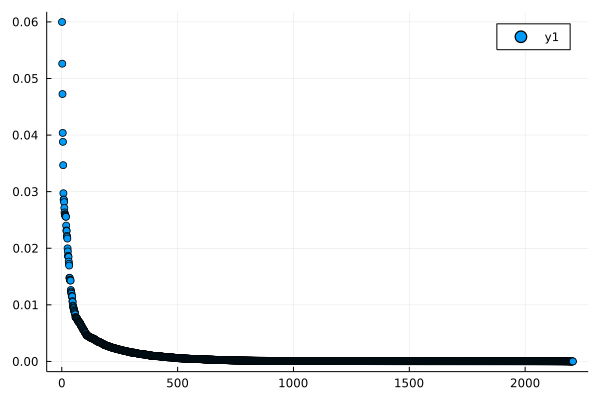

In [13]:
scatter(Z_frame_top[:,2])

In [14]:
length_top = 10
Z_top_inds = Int.(Z_frame_top[1:length_top, 1])

10-element Vector{Int64}:
  84
  83
 201
 117
 200
  34
 252
 118
  28
  85

In [15]:
# need to specify length of inverse real transform since the rfft is [d/2] long
# and the inverse could be 2[d/2] or 2[d/2] + 1, depending on whether the original
# vector has even or odd length
irfft(rfft(fr_frame), frame_length) ≈ fr_frame 

true

In [16]:
irfft(fr_frame_hat, frame_length)

4410-element Vector{Float64}:
 -0.004272591326639566
 -0.004272591326639593
 -0.004272591326639585
 -0.004394665364543574
 -0.0041505172887356485
 -0.003906369212927633
 -0.004150517288735629
 -0.004516739402447585
 -0.004394665364543619
 -0.004272591326639544
 -0.004516739402447604
 -0.004272591326639608
 -0.004150517288735583
  ⋮
  0.1711478011413923
  0.19287697988830227
  0.21472823267311625
  0.22168645283364358
  0.2078920865504929
  0.17896053956724756
  0.14978484450819424
  0.13623462630085156
  0.14087343974120314
  0.15601062044129763
  0.17371135593737605
  0.19104586931974246

In [17]:
fr_frame_hat_top = zero(fr_frame_hat)

2206-element Vector{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
     ⋮
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [18]:
fr_frame_hat_top[Z_top_inds] .= fr_frame_hat[Z_top_inds]

10-element view(::Vector{ComplexF64}, [84, 83, 201, 117, 200, 34, 252, 118, 28, 85]) with eltype ComplexF64:
   -33.7650251711755 + 127.8710499762217im
  108.41005282342019 + 41.29016467622009im
   47.28912071929959 - 92.83249405927802im
   87.41383980697887 - 16.948297321524066im
  -77.03232742431845 - 37.24679501403924im
   38.90968266012986 + 65.83057114989342im
   63.96465597470014 - 14.276368846574574im
  10.316555631606104 + 62.23208374945314im
   61.86100665910691 - 11.933514499402156im
 -61.505724880242866 - 8.424336072876883im

In [19]:
fr_frame_top = irfft(fr_frame_hat_top, frame_length)

4410-element Vector{Float64}:
  0.11150196680249652
  0.11516766061405595
  0.11368059086290214
  0.10637386031287596
  0.09315763965670329
  0.07450428034735375
  0.05137454324737222
  0.025097235581594872
 -0.002780738607949011
 -0.03065452950203257
 -0.05701245421062473
 -0.08056136742483745
 -0.10031407942897248
  ⋮
  0.1516474862083523
  0.13228654557664848
  0.11255622795344099
  0.09465256693964455
  0.08038808658361979
  0.0710105761866862
  0.0670902363423428
  0.06848536640942049
  0.07438762259453546
  0.08343888439499116
  0.09390397105741917
  0.10387772808735342

WAVArray{Float64, 1}(44100.0f0, [0.11150196680249652, 0.11516766061405595, 0.11368059086290214, 0.10637386031287596, 0.09315763965670329, 0.07450428034735375, 0.05137454324737222, 0.025097235581594872, -0.002780738607949011, -0.03065452950203257  …  0.11255622795344099, 0.09465256693964455, 0.08038808658361979, 0.0710105761866862, 0.0670902363423428, 0.06848536640942049, 0.07438762259453546, 0.08343888439499116, 0.09390397105741917, 0.10387772808735342], "Parte da frase de piano comprimida")

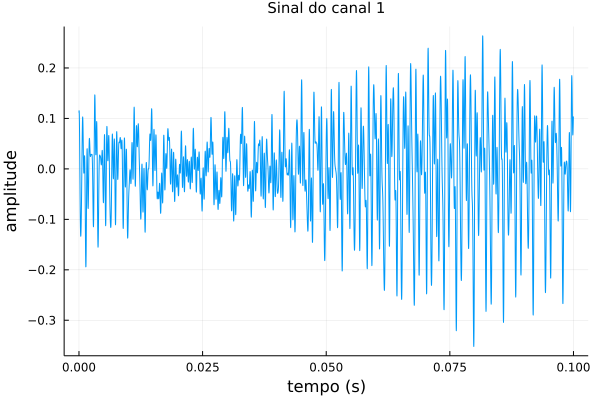

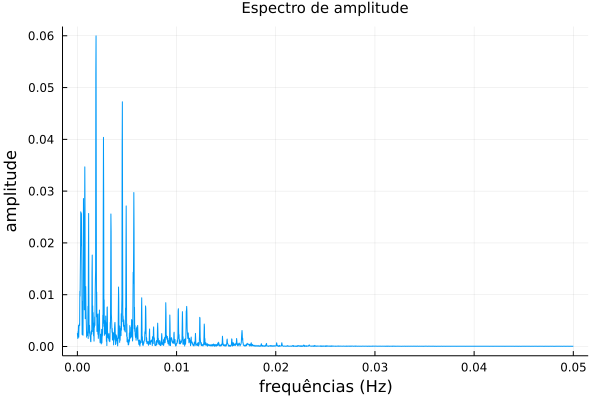

In [20]:
freqs_frame = (0:div(frame_length, 2)) / frs # frequências
fr_frame_top_hat = rfft(fr_frame)
Z_frame_top_back = [
    abs(fr_frame_top_hat[1]) / frame_length; 
    2abs.(fr_frame_top_hat[2:end]) / frame_length
]

display(WAVArray(frs, fr_frame_top, "Parte da frase de piano comprimida"))

display(plot(tempos_frame, fr_frame_top, xlabel="tempo (s)", ylabel="amplitude", label=nothing,
    title="Sinal do canal 1", titlefont=10))
display(plot(freqs_frame, Z_frame_top_back, xlabel="frequências (Hz)", ylabel="amplitude", label=nothing,
    title="Espectro de amplitude", titlefont=10))

WAVArray{Float64, 1}(44100.0f0, [-0.004272591326639607, -0.004272591326639607, -0.004272591326639607, -0.004394665364543596, -0.004150517288735618, -0.003906369212927641, -0.004150517288735618, -0.0045167394024475845, -0.004394665364543596, -0.004272591326639607  …  0.21472823267311625, 0.2216864528336436, 0.20789208655049288, 0.17896053956724753, 0.1497848445081942, 0.13623462630085148, 0.14087343974120303, 0.15601062044129765, 0.17371135593737602, 0.19104586931974243], "Parte da frase de piano")

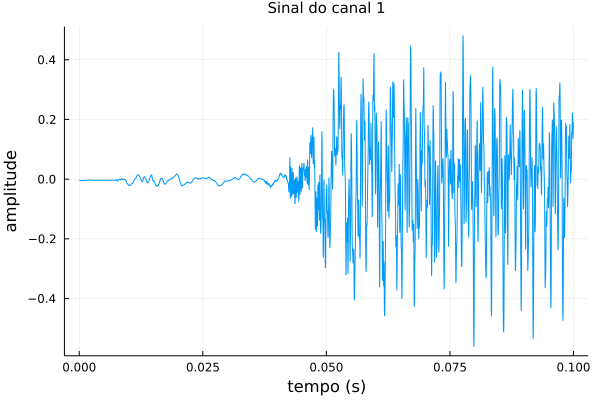

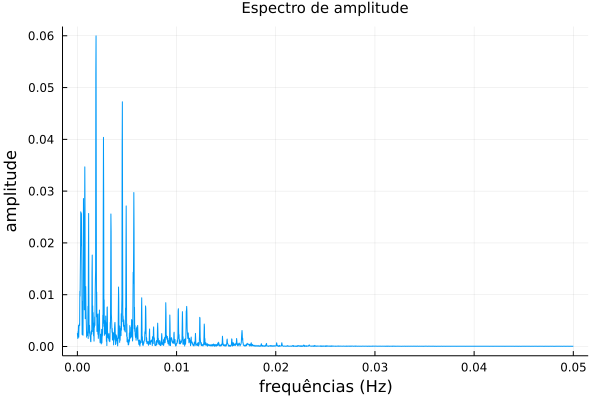

In [21]:
display(WAVArray(frs, fr_frame, "Parte da frase de piano"))

display(plot(tempos_frame, fr_frame, xlabel="tempo (s)", ylabel="amplitude", label=nothing,
    title="Sinal do canal 1", titlefont=10))
display(plot(freqs_frame, Z_frame, xlabel="frequências (Hz)", ylabel="amplitude", label=nothing,
    title="Espectro de amplitude", titlefont=10))

In [22]:
function compress_frame(fr_frame, frs, length_top = 50)
    frame_length = length(fr_frame)
    # tempos_frame = ( 0 : frame_length - 1 ) / frs
    freqs_frame = (0 : div(frame_length, 2)) / frs # frequências
    fr_frame_hat = rfft(fr_frame)
    Z_frame = [
        abs(fr_frame_hat[1]) / frame_length; 
        2abs.(fr_frame_hat[2:end]) / frame_length
    ]
    Z_frame_top = sortslices([eachindex(Z_frame) Z_frame], dims = 1, by = x -> x[2], rev = true)
    Z_top_inds = Int.(Z_frame_top[1:length_top, 1])
    fr_frame_hat_top = zero(fr_frame_hat)
    fr_frame_hat_top[Z_top_inds] .= fr_frame_hat[Z_top_inds]
    return (
        inds = Z_top_inds,
        freqs = fr_frame_hat[Z_top_inds],
    )
end

function uncompress_frame(inds, freqs, frame_length)
    fr_frame_hat_top = zeros(ComplexF64, div(frame_length, 2) + 1)
    fr_frame_hat_top[inds] .= freqs
    fr_frame_back = irfft(fr_frame_hat_top, frame_length)
    return fr_frame_back
end

uncompress_frame (generic function with 1 method)

In [23]:
comp = compress_frame(fr_frame, frs)

(inds = [84, 83, 201, 117, 200, 34, 252, 118, 28, 85  …  250, 149, 38, 184, 52, 12, 87, 80, 13, 199], freqs = ComplexF64[-33.7650251711755 + 127.8710499762217im, 108.41005282342019 + 41.29016467622009im, 47.28912071929959 - 92.83249405927802im, 87.41383980697887 - 16.948297321524066im, -77.03232742431845 - 37.24679501403924im, 38.90968266012986 + 65.83057114989342im, 63.96465597470014 - 14.276368846574574im, 10.316555631606104 + 62.23208374945314im, 61.86100665910691 - 11.933514499402156im, -61.505724880242866 - 8.424336072876883im  …  -1.5763830555113834 - 26.78384302022884im, 25.903531967888746 - 5.098261475424839im, -13.390624767147212 - 21.709999745152565im, 17.801332197848176 + 18.00447646320448im, -14.644280862638023 - 20.641033804450984im, -7.686096144051213 + 22.207414433972158im, -22.74665240232254 - 4.254979491656448im, 8.768875950052678 - 19.891876336588567im, 7.732962888637602 - 19.993290844392874im, -8.325204794243822 + 19.273903426153318im])

In [24]:
fr_frame_bak = uncompress_frame(comp.inds, comp.freqs, frame_length)

4410-element Vector{Float64}:
  0.12204643788761159
  0.11851994936975584
  0.11077768425394952
  0.09853635305203903
  0.08198994752532586
  0.061800262610382094
  0.03903025110065623
  0.015029397447569474
 -0.00871384475760439
 -0.03073368257998395
 -0.04974247027391702
 -0.06476110629338742
 -0.07520905022990253
  ⋮
  0.13059511392271614
  0.12797873695346687
  0.12335843470416524
  0.11803899901224801
  0.11323538419736555
  0.10990532262619392
  0.10862157921677124
  0.109499252160545
  0.1121862270524816
  0.1159167139641683
  0.11961978742660023
  0.12206801454800167

In [25]:
display(WAVArray(frs, fr_frame_bak, "compressed audio"))

WAVArray{Float64, 1}(44100.0f0, [0.12204643788761159, 0.11851994936975584, 0.11077768425394952, 0.09853635305203903, 0.08198994752532586, 0.061800262610382094, 0.03903025110065623, 0.015029397447569474, -0.00871384475760439, -0.03073368257998395  …  0.12335843470416524, 0.11803899901224801, 0.11323538419736555, 0.10990532262619392, 0.10862157921677124, 0.109499252160545, 0.1121862270524816, 0.1159167139641683, 0.11961978742660023, 0.12206801454800167], "compressed audio")

In [26]:
frame_duration = 26 # ms - padrão mp3 é de 26 ms
frame_length = Int(div(frame_duration * frs, 1000))

1146

In [27]:
uncomp = Array{Float64, 2}(undef, div(length(fr), frame_length) * frame_length, 1)
for n in 1:div(length(fr), frame_length)
    nstart = ( n - 1 ) * frame_length + 1
    nend = n * frame_length
    lfr_frame = fr[nstart:nend, 1]
    comp_frame = compress_frame(lfr_frame, frs, 50)
    uncomp_frame = uncompress_frame(comp_frame.inds, comp_frame.freqs, length(lfr_frame))
    uncomp[nstart:nend, 1] .= uncomp_frame
end

In [28]:
display(WAVArray(frs, uncomp, "compressed audio"))

WAVArray{Float64, 2}(44100.0f0, [-0.0007923241279948253; -0.0015302402011201546; … ; -0.005413102257079467; -0.006042595345009632;;], "compressed audio")

In [29]:
display(WAVArray(frs, fr, "Frase de piano"))

WAVArray{Float64, 2}(44100.0f0, [-0.004272591326639607; -0.004272591326639607; … ; -0.0037537766655476546; -0.0038453321939756462;;], "Frase de piano")

## Referências

1. [Rassol Raissi, The theory behind MP3, dez/2002](http://www.mp3-tech.org/programmer/docs/mp3_theory.pdf)

1. [A. Carlacci, Ogg Vorbis and MP3 Audio Stream charecterization](https://webdocs.cs.ualberta.ca/~c603/latex/LaTeX_docs/article2/oggVorbis.pdf)